#### Please upvote, in case you find this notebook helpful
> <font size=4 color='Blue'>(The Visualizations are updated every 24 Hours)</font>

<img align="left" src="https://www.vmcdn.ca/f/files/okotokstoday/images/okotoks-today/covid-19.jpg;w=635"></img>

**You can refer to our Blog** :https://kite4sky.in/2020/04/10/covid-19-analysis/

**Live Dashboard: https://public.tableau.com/profile/kamal3974#!/vizhome/DashboardIndiaCovid1_1/Overview**

# Content :
<hr>

* **[Data Updates -Apr-14-2020](#Calander)** 
* **[Data Updates -Apr-21-2020](#Calander)** ***<span style="color:red">New</span>***
* [Correlation Analysis](#Correlation-Analysis) 
* **[Visualization on Map](#Visualization-on-Map)** 
    * [Global Confirmed Cases Heat Map](#Global-Confirmed-Cases-Heat-Map)
    * [Global Deaths Heat Map ](#Global-Deaths-Heat-Map)
* **[Testing Data Analysis](#Testing-Analysis)** ***<span style="color:red">New</span>***



<hr>
### COVID-19 is wreaking havoc across the globe!!!
1. How the countries are dealing with it
2.  Or one of those European countries that are literally on fire at the moment because of the virus? 
3.  How good is the US doing?
4.  While i am writing this kernal data for different countries in world is getting doubled each 2nd day, 4th day and so on. We all have been a complete failure for stopping the virus growth daily. As you can see in the trend below, how the data for counties is getting doubled each 2nd day or 4th day. Japan is the only country which is having doubling rate near about to week. Week later USA was doubling it count in 4 Days. This week i.e. as of 8th April ,the number of confirmed coronavirus cases in the U.S. surpassed 426,000 on Wednesday, according to figures provided by NBC, with 12,864 fatalities nationwide.Just one week back they were having around 213,000 cases. India is also doubling its figures every 4th-5th consecutive day now. India was having 3082 cases on 4th April and on 8th April it have been doubled to 5916. You can refer to image below as per doubling rate for different counties. As per the graph we can easily see the growth for Spain, Italy and Germany have started to steep down. We will discuss the reason for this further
5.  How Lockdown wordk? 
6.  Lessons to learn from countries who have done good so far?



In [1]:
!pip install pycountry_convert
!pip install folium
!pip install plotly

#### Applying web scrapping 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
#import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "xgridoff"


%matplotlib inline


%matplotlib inline

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

req = requests.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(req.text, "lxml")

df_country = soup.find('div',attrs={"id" : "nav-tabContent"}).find('table',attrs={"id" : "main_table_countries_today"}).find_all('tr')
arrCountry = []
for i in range(8,len(df_country)-1):
#for i in range(1,205):
    tmp = df_country[i].find_all('td')
    if (tmp[0].string.find('<a') == -1):
        country = [tmp[0].string]
    else:
        country = [tmp[0].a.string] # Country
    for j in range(1,12):
        if (str(tmp[j].string) == 'None' or str(tmp[j].string) == ' '):
            country = country + [0]
        else:
            #country = country + [float(tmp[j].string.replace(',','').replace('+',''))]
            #Float have been removed due to error
            country = country + [(tmp[j].string.replace(',','').replace('+',''))]
    arrCountry.append(country)
df_worldinfor = pd.DataFrame(arrCountry)
df_worldinfor.columns = ['Country','Total Cases','Cases','Total Deaths','Deaths','Total Recovers','Active','Serious Critical',
                        'Total Cases/1M pop','Deaths/1M pop','Total Test','Tests/1M pop']
#df_worldinfor.columns = ['Country','Total Cases','Cases','Total Deaths','Deaths','Total Recovers','Active','Serious Critical',
#                         'Total Cases/1M pop']
for i in range(0,len(df_worldinfor)):
    df_worldinfor['Country'].iloc[i] = df_worldinfor['Country'].iloc[i].strip()

In [4]:
#df_worldinfor.to_csv('testingdataworldwide.csv')
df_worldinfor.head()
#df_worldinfor=pd.to_numeric(df_worldinfor["Total Cases"], downcast="float")
df_worldinfor1=df_worldinfor.apply(pd.to_numeric,errors='ignore')
df_worldinfor1['Total Recovers']= pd.to_numeric(df_worldinfor1['Total Recovers'],errors='coerce')
df_worldinfor1.head()

Country  Total Cases  Cases  Total Deaths  Deaths  Total Recovers   Active  \
0   World      2530919  50416        174839    4442        667661.0  1688419   
1     USA       803575  10816         43663    1149         75317.0   684595   
2   Spain       204178   3968         21282     430         82514.0   100382   
3   Italy       183957   2729         24648     534         51600.0   107709   
4  France       155383      0         20265       0         37409.0    97709   

   Serious Critical  Total Cases/1M pop  Deaths/1M pop  Total Test  \
0             57764               325.0           22.4           0   
1             13951              2428.0          132.0     4096881   
2              7705              4367.0          455.0      930230   
3              2471              3043.0          408.0     1450150   
4              5683              2380.0          310.0      463662   

   Tests/1M pop  
0             0  
1         12377  
2         19896  
3         23985  
4          7103

In [5]:
df_worldinfor1 = df_worldinfor1[df_worldinfor1.Country != 'Total:']
df_worldinfor1.style.background_gradient(cmap='Wistia')

In [6]:
df_worlddata = df_worldinfor1[df_worldinfor1.Country != 'World']
df_worlddata.index = df_worlddata["Country"]
df_worlddata = df_worlddata.drop(['Country'],axis=1)
df_worlddata.head()

Total Cases  Cases  Total Deaths  Deaths  Total Recovers  Active  \
Country                                                                     
USA           803575  10816         43663    1149         75317.0  684595   
Spain         204178   3968         21282     430         82514.0  100382   
Italy         183957   2729         24648     534         51600.0  107709   
France        155383      0         20265       0         37409.0   97709   
Germany       148024    959          4948      86         95200.0   47876   

         Serious Critical  Total Cases/1M pop  Deaths/1M pop  Total Test  \
Country                                                                    
USA                 13951              2428.0          132.0     4096881   
Spain                7705              4367.0          455.0      930230   
Italy                2471              3043.0          408.0     1450150   
France               5683              2380.0          310.0      463662   
Germany              2889              1767.0           59.0     1728357   

         Tests/1M pop  
Country                
USA             12377  
Spain           19896  
Italy           23985  
France           7103  
Germany         20629

<hr>
1. Validating Testing Data around the world
2. How different counties are performing test wise around the world
3. Let us visulize as per total number of test and test among Million people

In [7]:
df_test=df_worlddata.drop(['Total Cases','Cases','Total Deaths','Deaths','Total Recovers','Active','Serious Critical',
                           'Total Cases/1M pop','Deaths/1M pop'],axis=1)

In [8]:
df_test.head()

Total Test  Tests/1M pop
Country                          
USA         4096881         12377
Spain        930230         19896
Italy       1450150         23985
France       463662          7103
Germany     1728357         20629

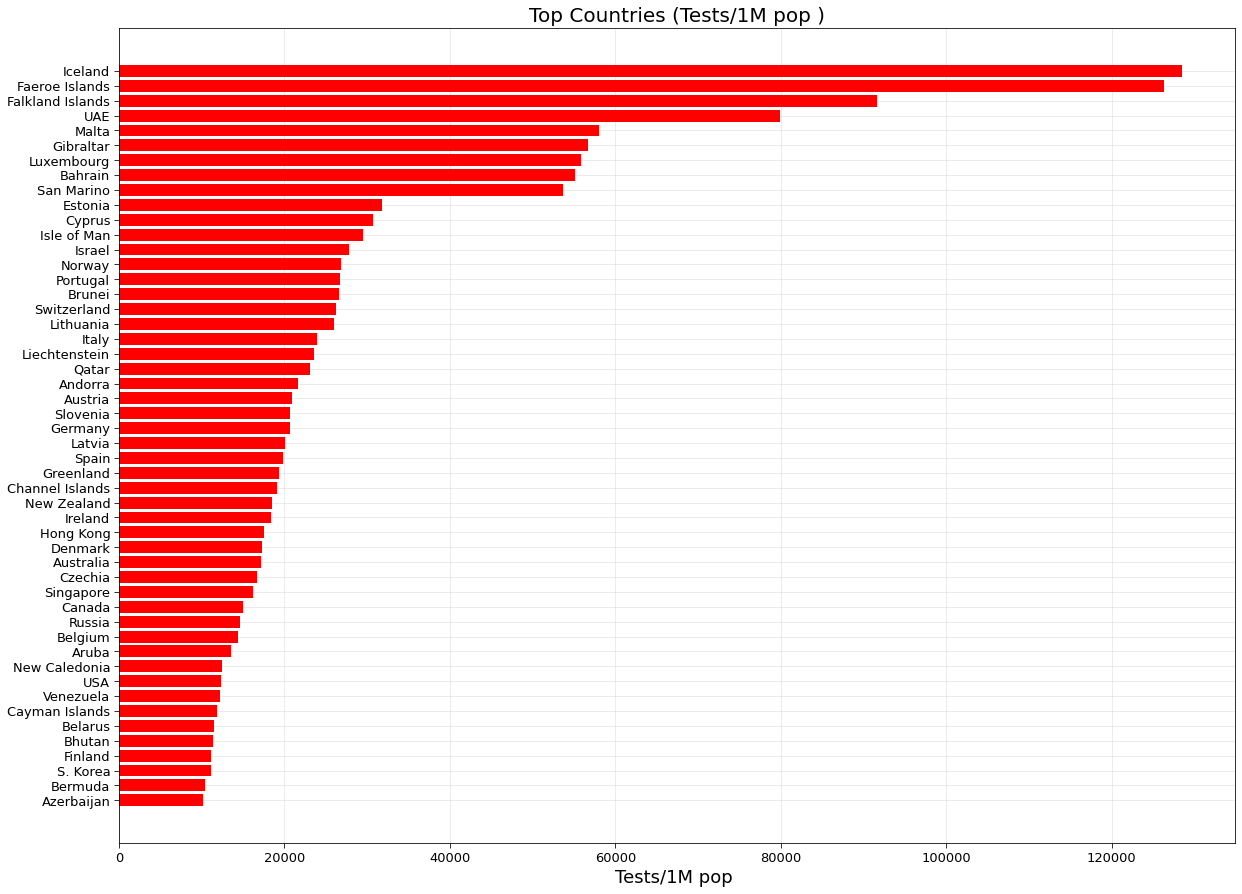

In [9]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_test.sort_values('Tests/1M pop')["Tests/1M pop"].index[-50:],df_test.sort_values('Tests/1M pop')["Tests/1M pop"].values[-50:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Tests/1M pop ",fontsize=18)
plt.title("Top Countries (Tests/1M pop )",fontsize=20)
plt.grid(alpha=0.3)

**Top 20 Countries as per Total number of Test**

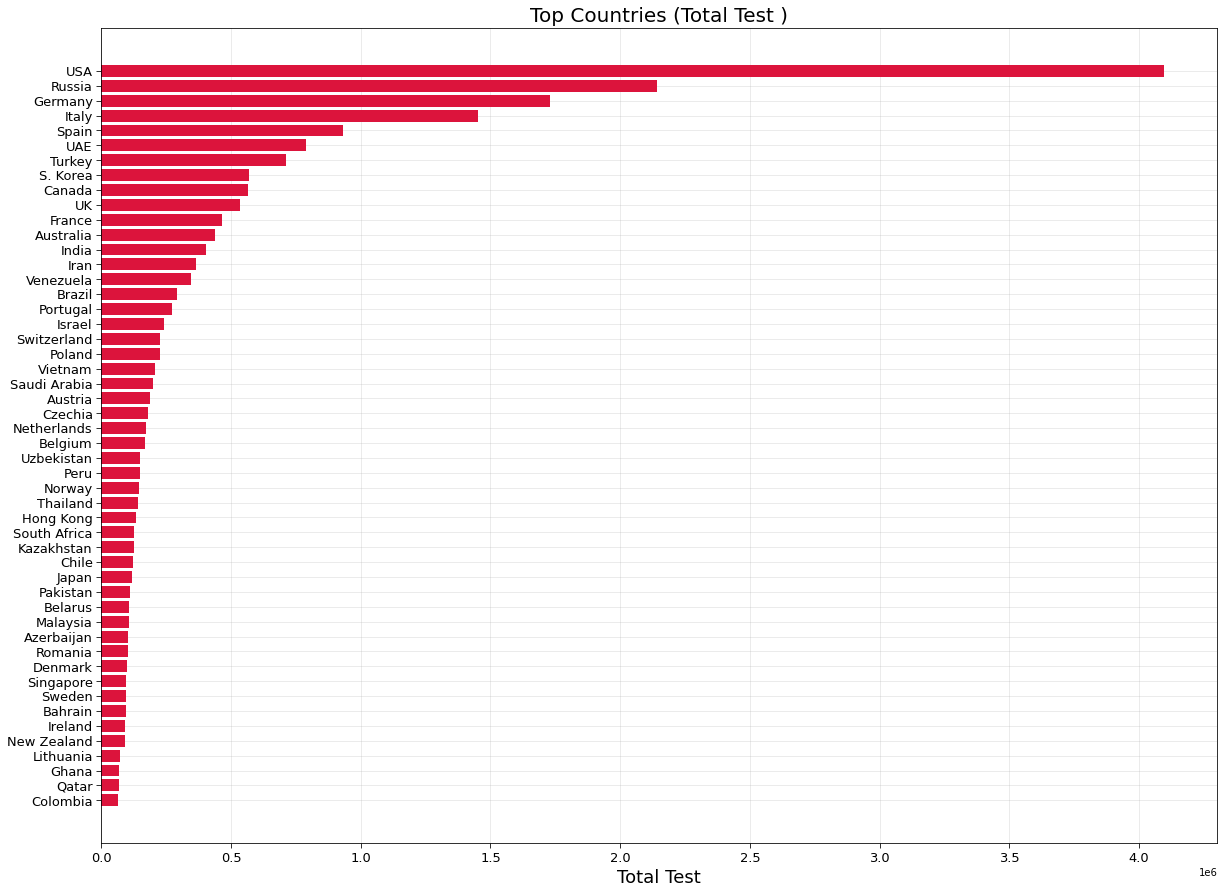

In [10]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_test.sort_values('Total Test')["Total Test"].index[-50:],df_test.sort_values('Total Test')["Total Test"].values[-50:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Total Test",fontsize=18)
plt.title("Top Countries (Total Test )",fontsize=20)
plt.grid(alpha=0.3)

<hr>
**As per figure above you can notice following points**
1. USA is doing maximum number of test nowdays and that is the reason they are having so much count nowdays
2. India have also increase number of test at daily basis now
3. South Korea, despite being less number of cases have done more number of test, and that is the reason they are able to make the curve flat after their count of 9 k cases

**Some more analysis On Testing**

In [11]:
df_test_Final=df_worldinfor1.drop(['Cases','Deaths','Total Recovers','Active','Serious Critical','Deaths/1M pop','Total Cases/1M pop'],axis=1)


In [12]:
df_test_Final["MortalityRate"] = np.round(100*df_test_Final["Total Deaths"]/df_test_Final["Total Cases"],2)
df_test_Final["Positive"] = np.round(100*df_test_Final["Total Cases"]/df_test_Final["Total Test"],2)

In [13]:
df_test_Final = df_test_Final[df_test_Final.Country != 'World']
df_test_Final.head(2)

Country  Total Cases  Total Deaths  Total Test  Tests/1M pop  MortalityRate  \
1     USA       803575         43663     4096881         12377           5.43   
2   Spain       204178         21282      930230         19896          10.42   

   Positive  
1     19.61  
2     21.95

In [14]:
df_test_Final.style.background_gradient(cmap='Blues',subset=["Total Test"])\
                        .background_gradient(cmap='Reds',subset=["Tests/1M pop"])\
                        .background_gradient(cmap='Greens',subset=["Total Cases"])\
                        .background_gradient(cmap='Purples',subset=["Total Deaths"])\
                        .background_gradient(cmap='YlOrBr',subset=["MortalityRate"])\
                        .background_gradient(cmap='bone_r',subset=["Positive"])

/opt/conda/lib/python3.6/site-packages/pandas/io/formats/style.py:1031: RuntimeWarning:

invalid value encountered in double_scalars



In [15]:
df_test_Final.corr().style.background_gradient(cmap='Blues').format("{:.2f}")

In [16]:
df_test_Final_top = df_test_Final[df_test_Final['Total Test'] > 200000] 

In [17]:
fig = px.bar(df_test_Final_top.sort_values("Total Test"),
            x='Country', y="Total Test",
            text = "MortalityRate",
            hover_name="Country",
            hover_data=["Total Cases","Total Deaths","Total Test","Positive"],
            title='COVID-19: Tests Over Countries',
)

fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Number of Tests (Text on bars is Mortality Rate %)")
fig.show()



In [18]:
fig = px.pie(df_test_Final_top, values='Total Test', names='Country')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [19]:
fig = px.pie(df_test_Final_top, values='Tests/1M pop', names='Country')
fig.update_traces(textposition='inside',textfont_size=14)
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

**
**Let us now analyze top 20 countries with number of Total cases**
**Will analyze Top counties as per confirmed, Most number of deaths, recovered and Critical case(Requiring ICU)**

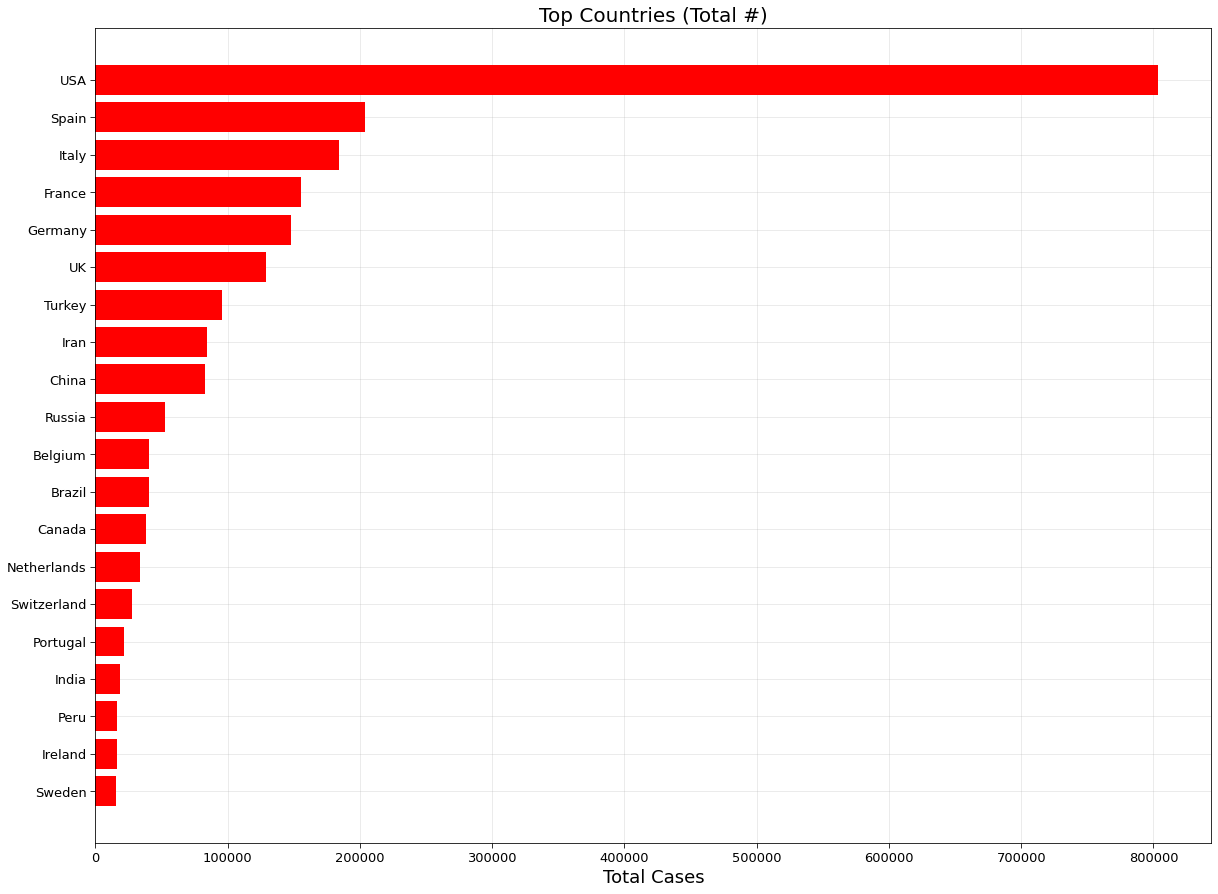

In [20]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_worlddata.sort_values('Total Cases')["Total Cases"].index[-20:],df_worlddata.sort_values('Total Cases')["Total Cases"].values[-20:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Total Cases",fontsize=18)
plt.title("Top Countries (Total #)",fontsize=20)
plt.grid(alpha=0.3)

**Top Contries as per Active Cases**

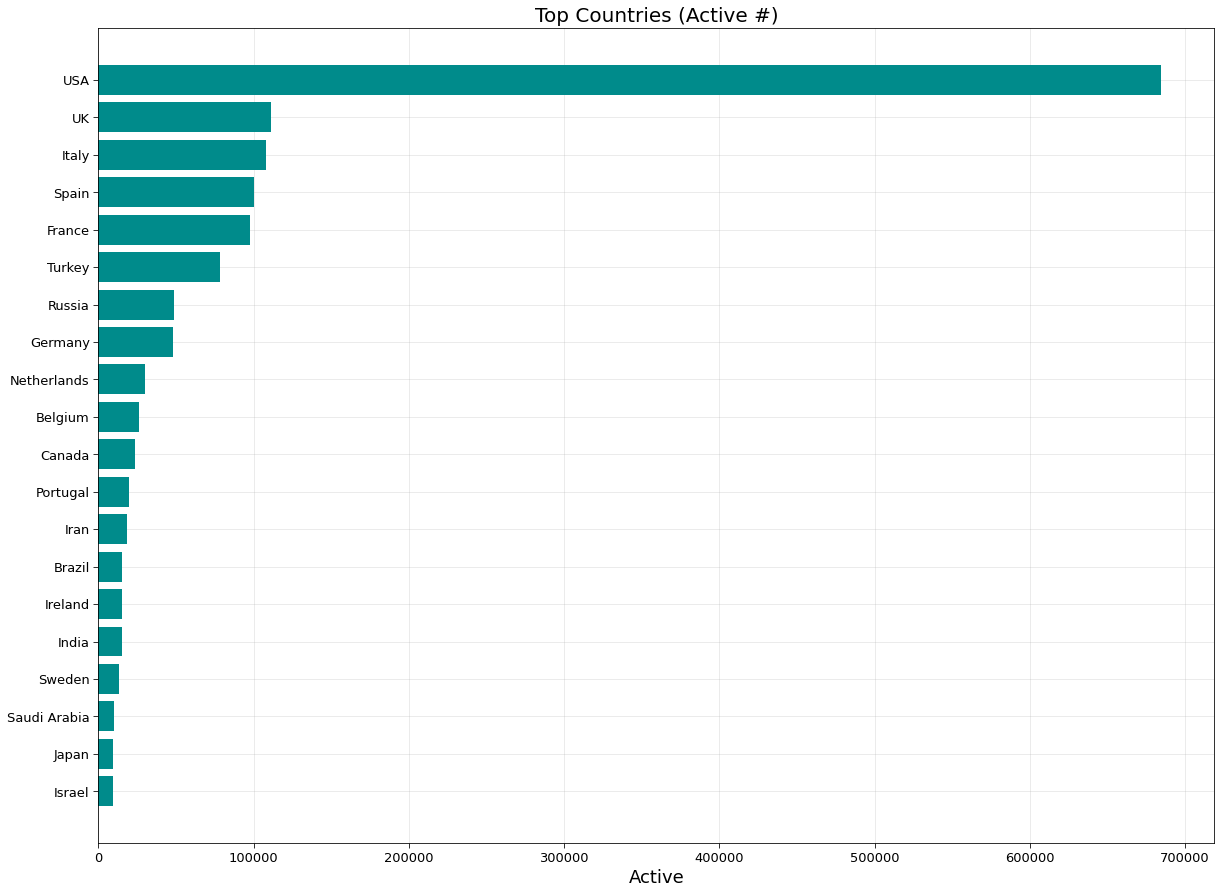

In [21]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_worlddata.sort_values('Active')["Active"].index[-20:],df_worlddata.sort_values('Active')["Active"].values[-20:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active",fontsize=18)
plt.title("Top Countries (Active #)",fontsize=20)
plt.grid(alpha=0.3)

<hr>
### Let us now identify critical cases
1. This will be most important as this will identify the number of deaths in coming days
2. USA will have more number of death in coming day as they are having more number of serious cases
3. France and Spain followed by USA

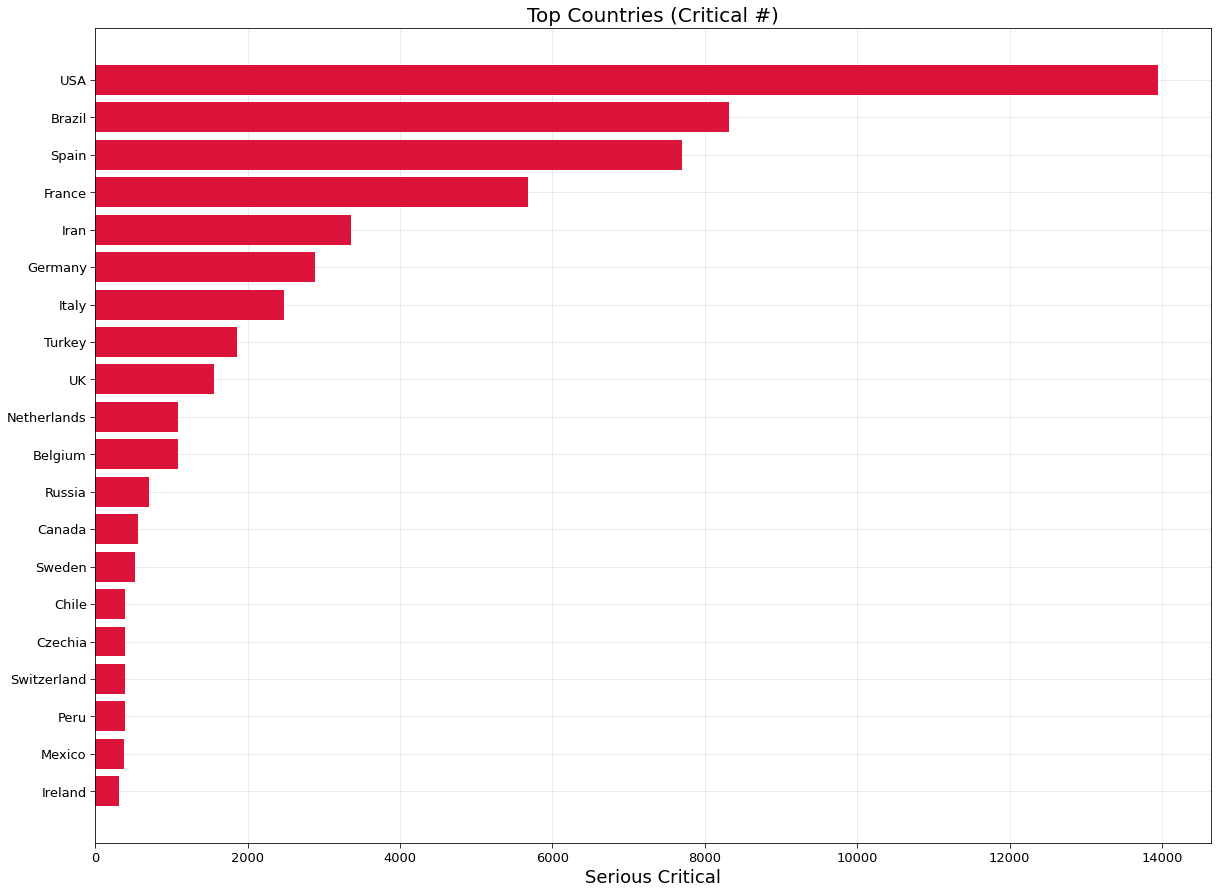

In [22]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_worlddata.sort_values('Serious Critical')["Serious Critical"].index[-20:],df_worlddata.sort_values('Serious Critical')["Serious Critical"].values[-20:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Serious Critical",fontsize=18)
plt.title("Top Countries (Critical #)",fontsize=20)
plt.grid(alpha=0.3)

In [23]:
# Retriving Dataset
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [24]:
covid_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [25]:
confirmed = confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
deaths = deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
recovered = recovered.rename(columns={"Province/State":"state","Country/Region": "country"})
covid_country = covid_country.rename(columns={"Country_Region": "country"})
covid_country["Active"] = covid_country["Confirmed"]-covid_country["Recovered"]-covid_country["Deaths"]

In [26]:
confirmed.head(),deaths.head(),covid_country.head(),recovered.head()

(  state      country      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
 0   NaN  Afghanistan  33.0000  65.0000        0        0        0        0   
 1   NaN      Albania  41.1533  20.1683        0        0        0        0   
 2   NaN      Algeria  28.0339   1.6596        0        0        0        0   
 3   NaN      Andorra  42.5063   1.5218        0        0        0        0   
 4   NaN       Angola -11.2027  17.8739        0        0        0        0   
 
    1/26/20  1/27/20  ...  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
 0        0        0  ...      555      607      665      714      784   
 1        0        0  ...      433      446      467      475      494   
 2        0        0  ...     1825     1914     1983     2070     2160   
 3        0        0  ...      601      638      646      659      673   
 4        0        0  ...       19       19       19       19       19   
 
    4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  
 0      840      906      93

In [27]:
confirmed.head()

state      country      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.0000  65.0000        0        0        0        0   
1   NaN      Albania  41.1533  20.1683        0        0        0        0   
2   NaN      Algeria  28.0339   1.6596        0        0        0        0   
3   NaN      Andorra  42.5063   1.5218        0        0        0        0   
4   NaN       Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  ...  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
0        0        0  ...      555      607      665      714      784   
1        0        0  ...      433      446      467      475      494   
2        0        0  ...     1825     1914     1983     2070     2160   
3        0        0  ...      601      638      646      659      673   
4        0        0  ...       19       19       19       19       19   

   4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  
0      840      906      933      996     1026  
1      518      539      548      562      584  
2     2268     2418     2534     2629     2718  
3      673      696      704      713      717  
4       19       19       24       24       24  

[5 rows x 94 columns]

In [28]:
confirmed1=pd.melt(confirmed,id_vars=['state','country','Lat','Long'],var_name='date', value_name='Confirmed')
confirmed1['date'] = confirmed1['date'].astype('datetime64[ns]') 
confirmed1.sort_values(by="date")

state      country        Lat        Long       date  Confirmed
0               NaN  Afghanistan  33.000000   65.000000 2020-01-22          0
167         Curacao  Netherlands  12.169600  -68.990000 2020-01-22          0
168    Sint Maarten  Netherlands  18.042500  -63.054800 2020-01-22          0
169             NaN  Netherlands  52.132600    5.291300 2020-01-22          0
170             NaN  New Zealand -40.900600  174.886000 2020-01-22          0
...             ...          ...        ...         ...        ...        ...
23589     Greenland      Denmark  71.706900  -42.604300 2020-04-20         11
23590           NaN      Denmark  56.263900    9.501800 2020-04-20       7515
23591           NaN     Djibouti  11.825100   42.590300 2020-04-20        846
23577      Zhejiang        China  29.183200  120.093400 2020-04-20       1268
23759           NaN        Yemen  15.552727   48.516388 2020-04-20          1

[23760 rows x 6 columns]

In [29]:
grouped = confirmed1.groupby('date')['date', 'Confirmed'].sum().reset_index()

fig = px.line(grouped, x="date", y="Confirmed", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="date", y="Confirmed", 
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

<hr>
1. **Looks like the exponential growth of the pandemic is still in it's peaks and that is not good at all**

2. **Now max of Europe and USA and countries like India are also doubling the case in 4 days or weeks which is not good at all**

3. **Number of cases are increasing as world have increase number of test. You can view from viz provided above for Testing Data**



###  Looking for Data for USA, Italy, Spain, etc and comparing with rest of world

In [30]:
Confirmed_US = confirmed1[confirmed1['country'] == "US"].reset_index()
USData = Confirmed_US.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_Spain = confirmed1[confirmed1['country'] == "Spain"].reset_index()
SpainData = Confirmed_Spain.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_Italy = confirmed1[confirmed1['country'] == "Italy"].reset_index()
ItalyData = Confirmed_Italy.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_India = confirmed1[confirmed1['country'] == "India"].reset_index()
IndiaData = Confirmed_India.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_France = confirmed1[confirmed1['country'] == "France"].reset_index()
FranceData = Confirmed_France.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_China = confirmed1[confirmed1['country'] == "China"].reset_index()
ChinaData = Confirmed_China.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_UK = confirmed1[confirmed1['country'] == "United Kingdom"].reset_index()
UKData = Confirmed_UK.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_Germany = confirmed1[confirmed1['country'] == "Germany"].reset_index()
GermanyData = Confirmed_Germany.groupby('date')['Confirmed'].sum().reset_index()
Confirmed_Iran = confirmed1[confirmed1['country'] == "Iran"].reset_index()
IranData = Confirmed_Iran.groupby('date')['Confirmed'].sum().reset_index()

World_rest = confirmed1[~confirmed1['country'].isin(['China', 'Italy', 'US','Spain','Italy','Iran','France','United Kingdom','Germany'])].reset_index()
World_rest = World_rest.groupby('date')['date', 'Confirmed'].sum().reset_index()


In [31]:
plot_titles = ['China', 'Italy', 'US','Spain','Iran','France','United Kingdom','Germany', 'Rest of the World']
pio.templates.default = "plotly_dark"
fig = px.line(ChinaData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[0].upper()} Over Time", 
              color_discrete_sequence=['#F61067'],
              height=500
             )
fig.show()

fig = px.line(ItalyData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[1].upper()} Over Time", 
              color_discrete_sequence=['#91C4F2'],
              height=500
             )
fig.show()

fig = px.line(USData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[2].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()

fig = px.line(SpainData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[3].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()

fig = px.line(IranData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[4].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()


fig = px.line(FranceData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[5].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()

fig = px.line(UKData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[6].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()

fig = px.line(GermanyData, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[7].upper()} Over Time", 
              color_discrete_sequence=['#6F2DBD'],
              height=500
             )
fig.show()


fig = px.line(World_rest, x="date", y="Confirmed", 
              title=f"Confirmed Cases in {plot_titles[8].upper()} Over Time", 
              color_discrete_sequence=['#FFDF64'],
              height=500
             )
fig.show()
out = "output/"

<hr>
1. **In case we look as per counties above, they are having more then 65 % cases among 212 counties worldwide**
2. **China curve have been flatten after March**
3. **European country like Italy, France, Germany have sttep rise**
4. **USA case is very critical** but they have increase testing in large number during this days

In [32]:
countries=dict()
for cnt in confirmed1['country'].unique():
    countries[cnt]=confirmed1.loc[confirmed1['country']==cnt,'country'].unique()

In [33]:
countries

{'Afghanistan': array(['Afghanistan'], dtype=object),
 'Albania': array(['Albania'], dtype=object),
 'Algeria': array(['Algeria'], dtype=object),
 'Andorra': array(['Andorra'], dtype=object),
 'Angola': array(['Angola'], dtype=object),
 'Antigua and Barbuda': array(['Antigua and Barbuda'], dtype=object),
 'Argentina': array(['Argentina'], dtype=object),
 'Armenia': array(['Armenia'], dtype=object),
 'Australia': array(['Australia'], dtype=object),
 'Austria': array(['Austria'], dtype=object),
 'Azerbaijan': array(['Azerbaijan'], dtype=object),
 'Bahamas': array(['Bahamas'], dtype=object),
 'Bahrain': array(['Bahrain'], dtype=object),
 'Bangladesh': array(['Bangladesh'], dtype=object),
 'Barbados': array(['Barbados'], dtype=object),
 'Belarus': array(['Belarus'], dtype=object),
 'Belgium': array(['Belgium'], dtype=object),
 'Benin': array(['Benin'], dtype=object),
 'Bhutan': array(['Bhutan'], dtype=object),
 'Bolivia': array(['Bolivia'], dtype=object),
 'Bosnia and Herzegovina': array([

<hr>
### India Data
1. India recently have largest Lockdown Period of 21 Days ending on 14th April
2. Prime Minister Of India have extended Lockdwon upto May-5th
3. Lets see how india is doing in handling Covid-19 crisis

In [34]:
india_data = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
india_covid = pd.io.json.json_normalize(india_data['data']['statewise'])
india_covid = india_covid.set_index("state")

In [35]:
total = india_covid.sum()
total.name = "Total"
pd.DataFrame(total).transpose().style.background_gradient(cmap='OrRd',axis=1)

In [36]:
india_covid.corr().style.background_gradient(cmap='Reds')

In [37]:
india_covid.style.background_gradient(cmap='viridis')

**Mortality Count >5**

In [38]:
india_covid[india_covid['deaths'] > 5].style.background_gradient(cmap='PuBu')

**Recovery Count >50**

In [39]:
india_covid[india_covid['recovered'] > 50].style.background_gradient(cmap='PuBu')

**Active Count >50**

In [40]:
india_covid[india_covid['active'] > 50].style.background_gradient(cmap='afmhot')

**Active Count >50**

In [41]:
india_covid[india_covid['active'] < 30].style.background_gradient(cmap='gist_heat')

<hr> 
**Some of Key Findings**
1. India have crossed 10k Confirmed cases asof Apr-13
2. Maharshtra is the state with most number of cases with Recovered , Active  and confirm cases and even death as well followed by Delhi, Tamilnadu, Rajashthan, MP
3. Still there are 19 states which have less then 30 active count, govt. could stary slight business out there, locking entry from hot spot area

In [42]:

locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
india_covid["Lat"] = ""
india_covid["Long"] = ""
for index in india_covid.index :
    india_covid.loc[india_covid.index == index,"Lat"] = locations[index][0]
    india_covid.loc[india_covid.index == index,"Long"] = locations[index][1]

In [43]:
# url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
# state_json = requests.get(url).json()
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(india_covid[india_covid['confirmed']>0].index)):
    folium.Circle(
        location=[india_covid.iloc[i]['Lat'], india_covid.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+india_covid.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(india_covid.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(india_covid.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(india_covid.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(india_covid.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(india_covid.iloc[i]['deaths']/(india_covid.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(india_covid.iloc[i]['confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

### Analyzing USA Data

In [44]:
USA_Covid = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv")



USA_Covid = USA_Covid.loc[USA_Covid["Country_Region"]== "US"]
USA_Covid = USA_Covid.rename(columns={"Admin2":"County"})

In [45]:
USA_Covid.loc[:,["Province_State","Confirmed","Deaths","County"]].sort_values("Confirmed",ascending=False).set_index("County")[:16].style.background_gradient(cmap='Wistia')

In [46]:
USA_Covid[USA_Covid['Confirmed'] > 5000].style.background_gradient(cmap='afmhot')

In [47]:
# Retriving Dataset
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [48]:
covid_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [49]:
confirmed = confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
deaths = deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
recovered = recovered.rename(columns={"Province/State":"state","Country/Region": "country"})
covid_country = covid_country.rename(columns={"Country_Region": "country"})
covid_country["Active"] = covid_country["Confirmed"]-covid_country["Recovered"]-covid_country["Deaths"]


In [50]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed.columns[5]+" - "+confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = "output/"

In [51]:
country_df = covid_country.copy().drop(['Lat','Long_','Last_Update'],axis =1)
country_df.index = country_df["country"]
country_df = country_df.drop(['country'],axis=1)


In [52]:
country_df.head()

Confirmed  Deaths  Recovered  Active  Incident_Rate  People_Tested  \
country                                                                         
Australia       6547      67       4124    2356      25.715150            NaN   
Austria        14873     491      10971    3411     165.138124            NaN   
Canada         38424    1798      12917   23709     101.501222            NaN   
China          83853    4636      77799    1418       5.969560            NaN   
Denmark         7891     370       4889    2632     136.234866            NaN   

           People_Hospitalized  Mortality_Rate  UID ISO3  
country                                                   
Australia                  NaN        1.023369   36  AUS  
Austria                    NaN        3.301284   40  AUT  
Canada                     NaN        4.679367  124  CAN  
China                      NaN        5.528723  156  CHN  
Denmark                    NaN        4.688886  208  DNK

### Top 20 Countries as per Confirmed Cases

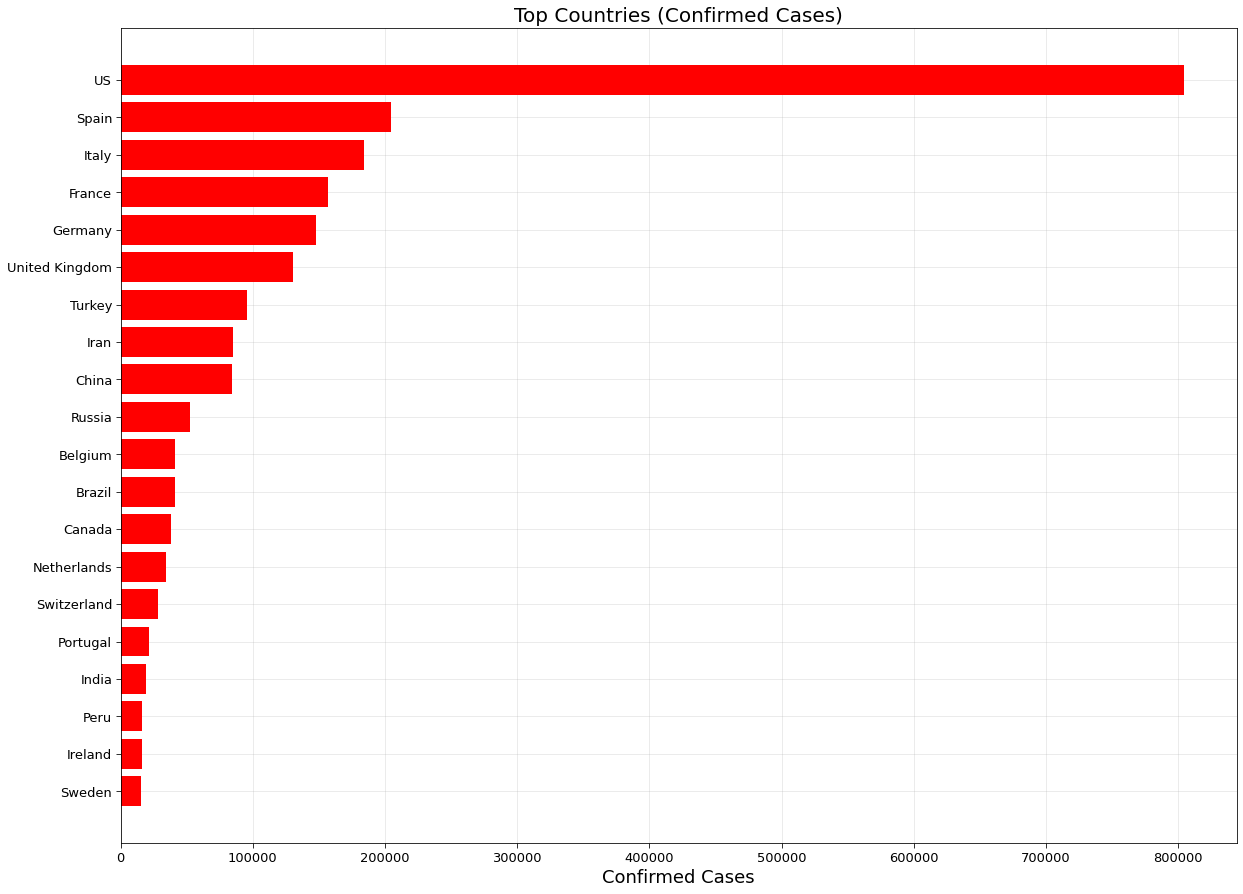

In [53]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(country_df.sort_values('Confirmed')["Confirmed"].index[-20:],country_df.sort_values('Confirmed')["Confirmed"].values[-20:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)


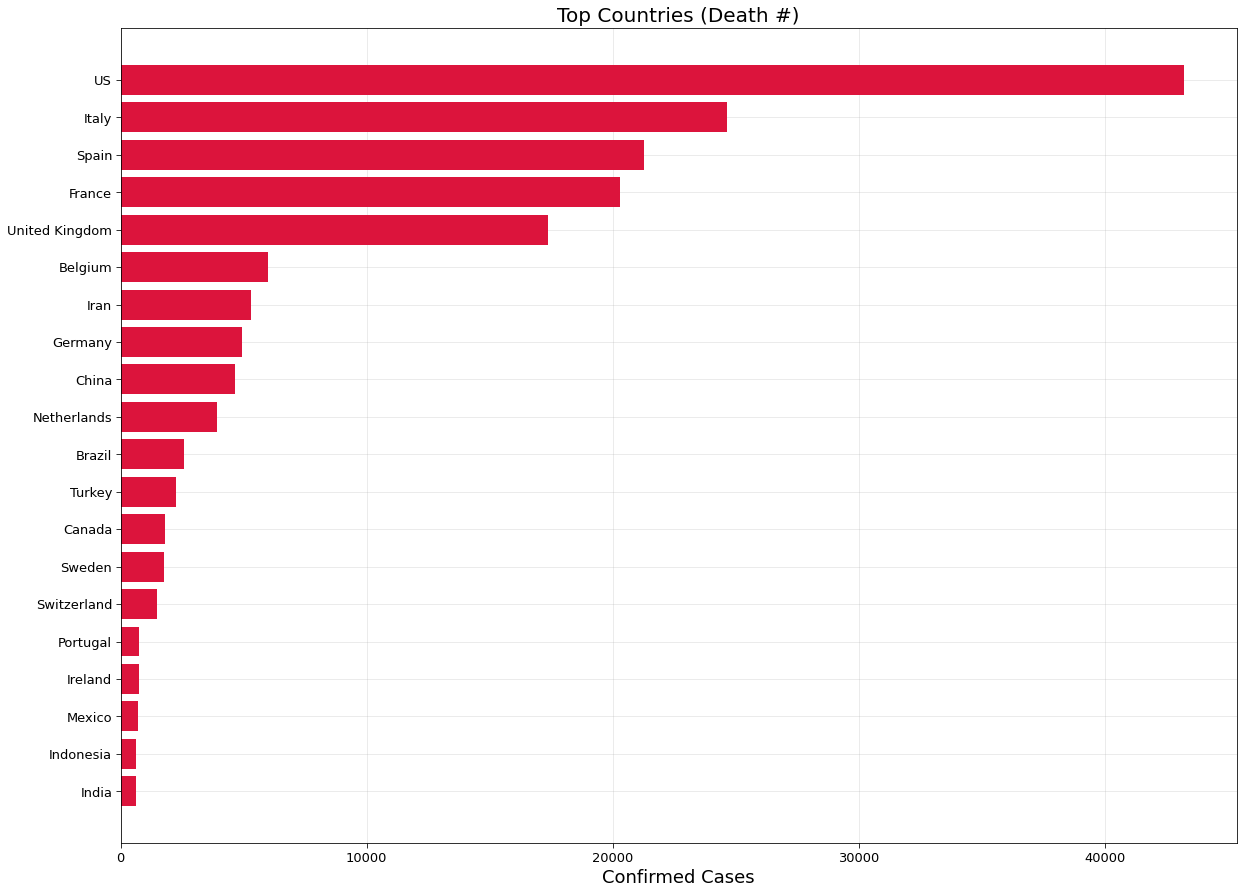

In [54]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(country_df.sort_values('Deaths')["Deaths"].index[-20:],country_df.sort_values('Deaths')["Deaths"].values[-20:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top Countries (Death #)",fontsize=20)
plt.grid(alpha=0.3)



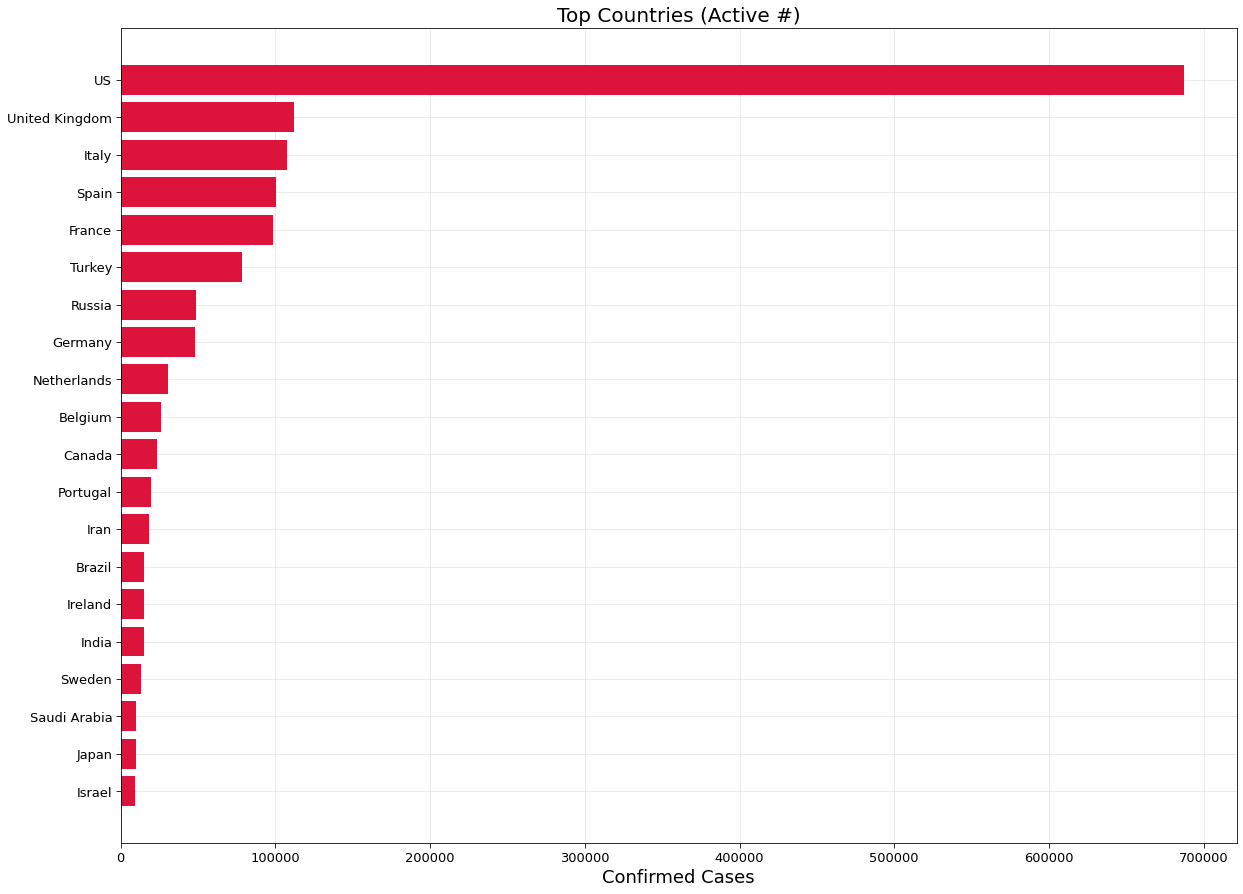

In [55]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(country_df.sort_values('Active')["Active"].index[-20:],country_df.sort_values('Active')["Active"].values[-20:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top Countries (Active #)",fontsize=20)
plt.grid(alpha=0.3)


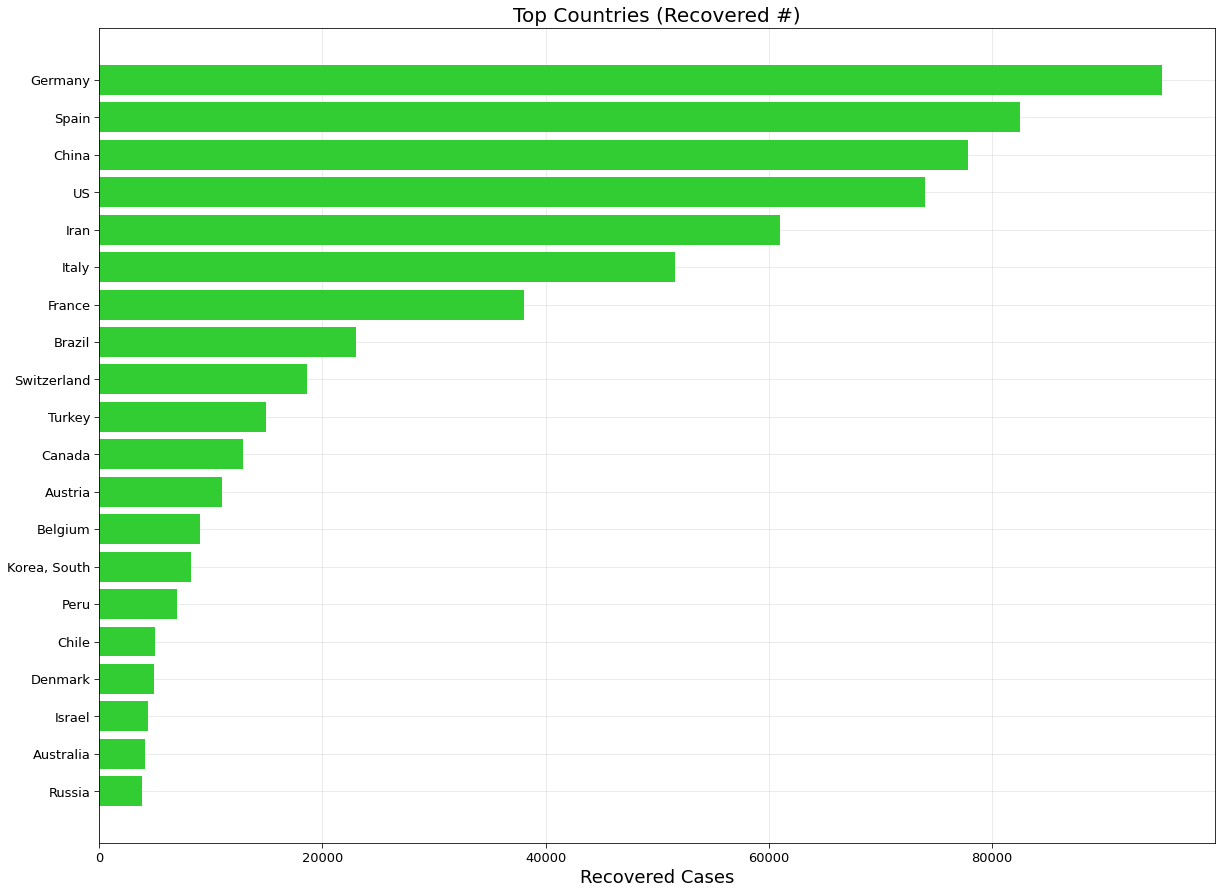

In [56]:
f = plt.figure(figsize=(20,15))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(country_df.sort_values('Recovered')["Recovered"].index[-20:],country_df.sort_values('Recovered')["Recovered"].values[-20:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top Countries (Recovered #)",fontsize=20)
plt.grid(alpha=0.3)


In [57]:
pd.DataFrame(country_df.sum()).transpose().style.background_gradient(cmap='Wistia',axis=1)

In [58]:
country_df.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='PuBu')


## Confirmed Cases on Maps

In [59]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(confirmed)):
    folium.Circle(
        location=[confirmed.iloc[i]['Lat'], confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(deaths.iloc[i,-1]/(confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


In [60]:
confirmed = confirmed.replace(np.nan, '', regex=True)
deaths = deaths.replace(np.nan, '', regex=True)

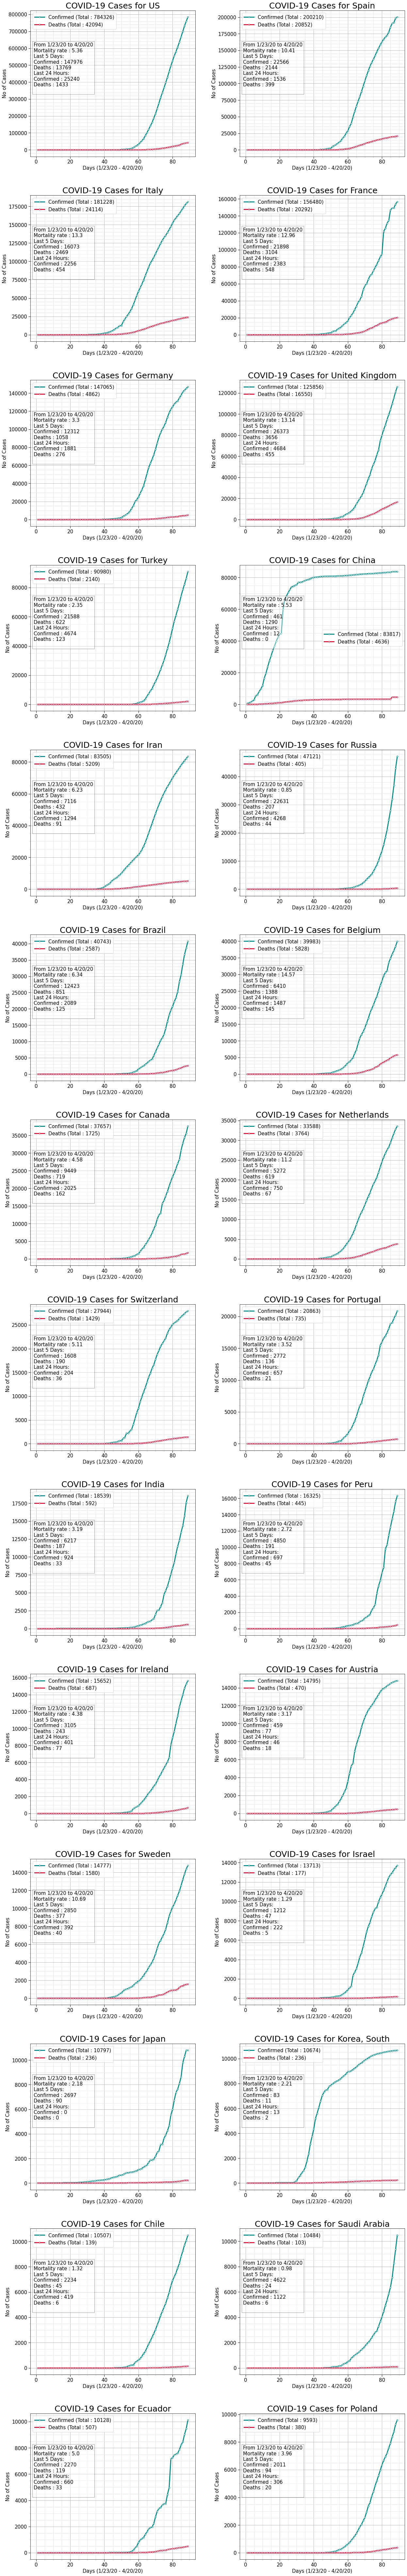

In [61]:
df_countries = confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 9000].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(confirmed, deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

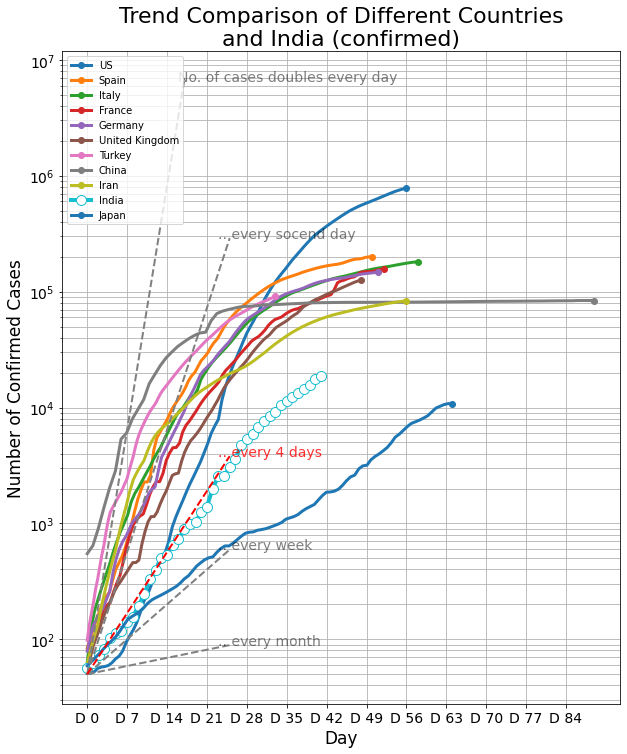

In [62]:
temp = confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "India" and country != "Japan" :
            continue
    x = 91
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 91)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,91,7),[ "D "+str(i) for i in range(91)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Day",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Countries\n and India (confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

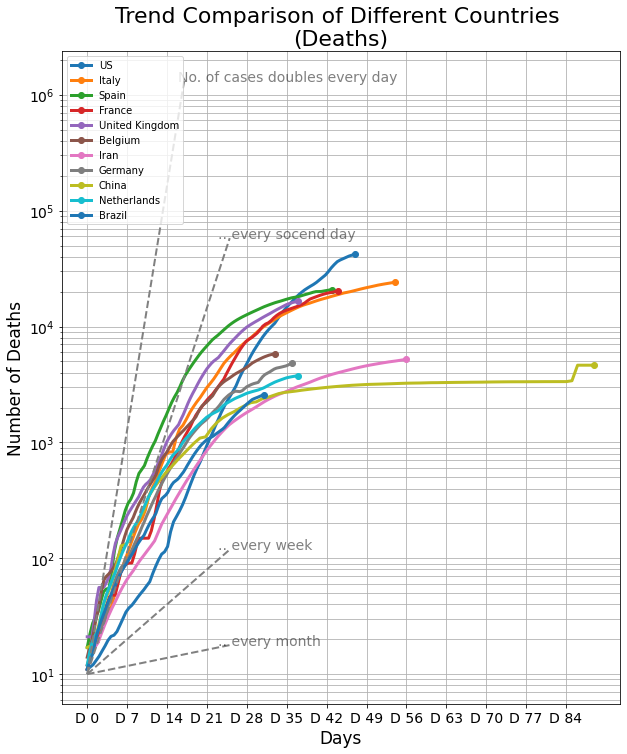

In [63]:
temp = deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i > 10:
        break
    x = 91
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 91)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,91,7),[ "D "+str(i) for i in range(91)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Countries \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.show()

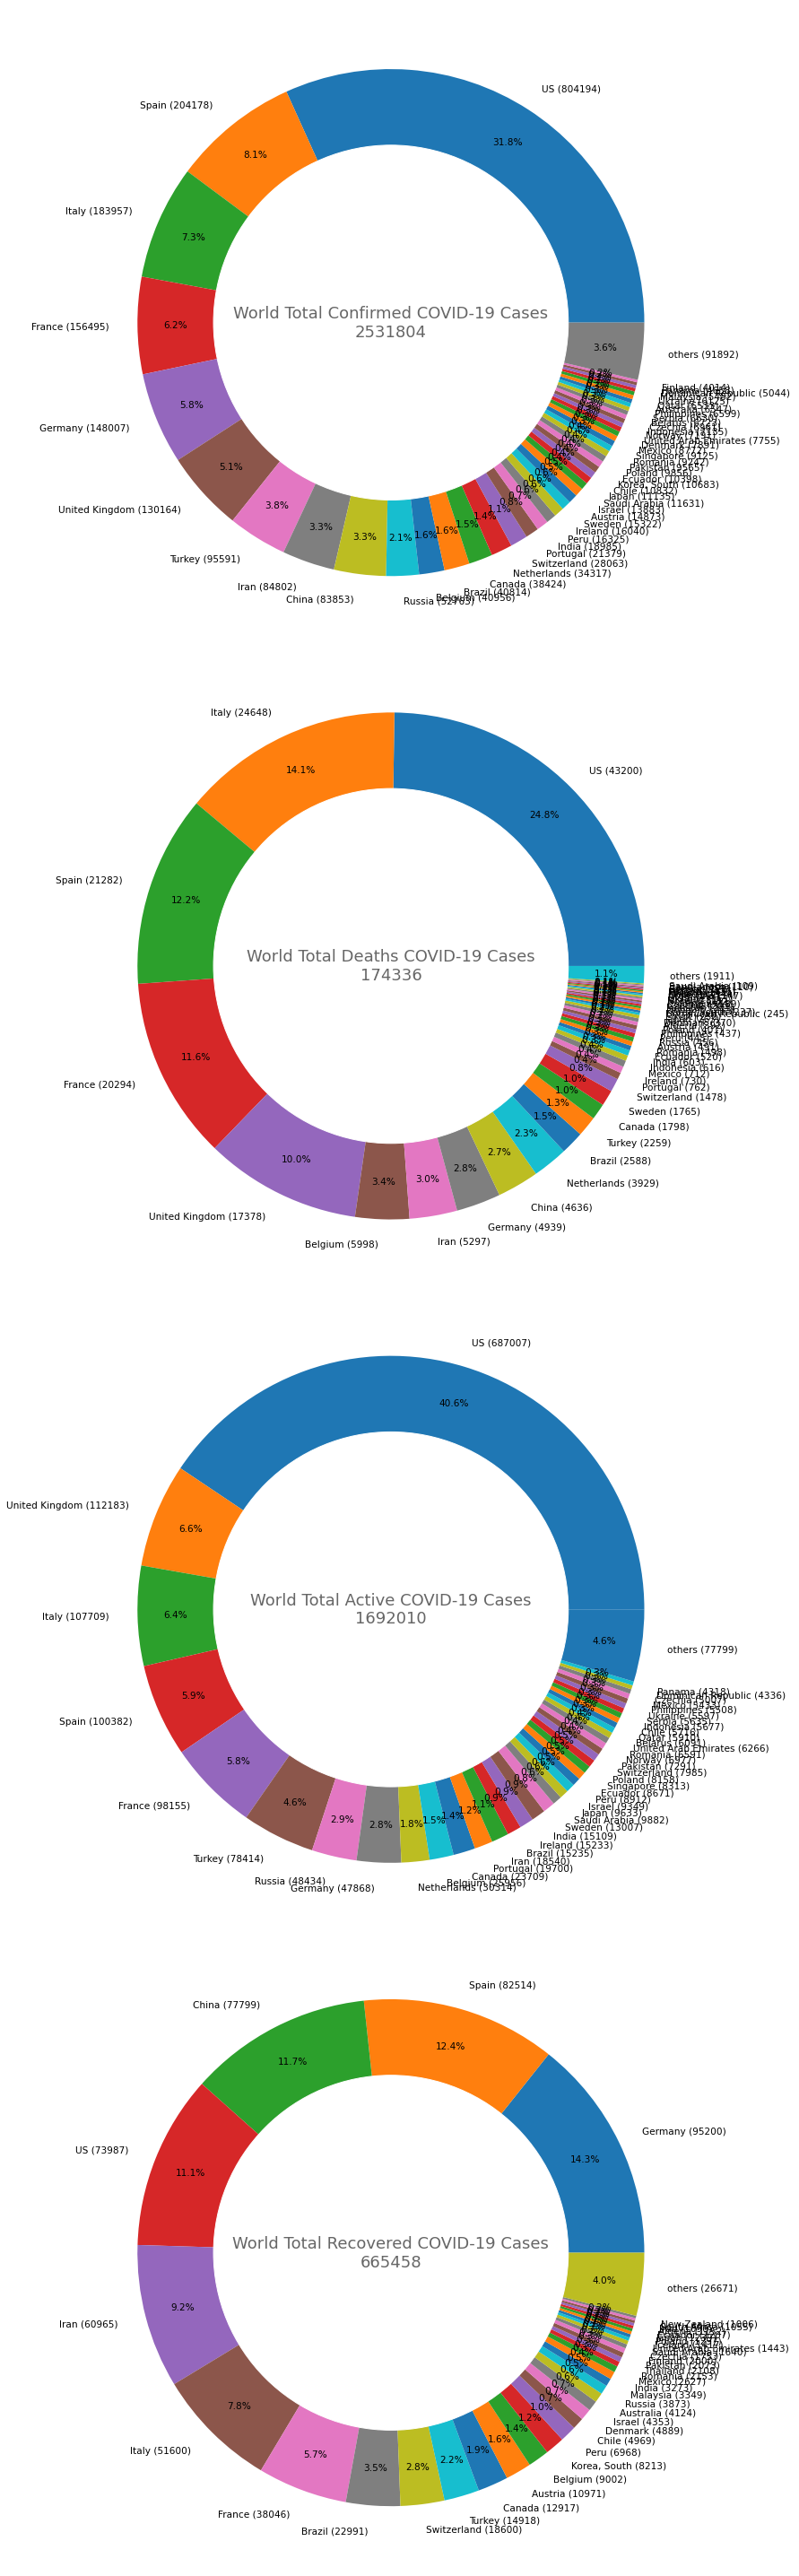

In [64]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [covid_country.loc[:,['country','Confirmed']],covid_country.loc[:,['country','Deaths']],covid_country.loc[:,['country','Active']],covid_country.loc[:,['country','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [4000,100,4000,1000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()


### Forecasting

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from random import random
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from tqdm import tqdm

def RMSLE(pred,actual):
    return np.sqrt(np.mean(np.power((np.log(pred+1)-np.log(actual+1)),2)))

In [66]:
pd.set_option('mode.chained_assignment', None)
test = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/test.csv")
train = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/train.csv")
train['Province_State'].fillna('', inplace=True)
test['Province_State'].fillna('', inplace=True)
train['Date'] =  pd.to_datetime(train['Date'])
test['Date'] =  pd.to_datetime(test['Date'])
train = train.sort_values(['Country_Region','Province_State','Date'])
test = test.sort_values(['Country_Region','Province_State','Date'])

In [67]:
train[['ConfirmedCases', 'Fatalities']] = train.groupby(['Country_Region', 'Province_State'])[['ConfirmedCases', 'Fatalities']].transform('cummax') 

**Adding some derived features**

In [68]:
train['NewCases'] = train['ConfirmedCases'] - train['ConfirmedCases'].shift(1)
train['NewCases'] = train['NewCases'].fillna(0.0)
train['FatalityNew'] = train['Fatalities'] - train['Fatalities'].shift(1)
train['FatalityNew'] = train['FatalityNew'].fillna(0.0)
train['MortalityRate'] = train['Fatalities'] / train['ConfirmedCases']
train['MortalityRate'] = train['MortalityRate'].fillna(0.0)
train['GrowthRate']= train['NewCases']/train['NewCases'].shift(1)
train['GrowthRate']= train['GrowthRate'].replace([-np.inf, np.inf],  0.0)
train['GrowthRate']= train['GrowthRate'].fillna(0.0) 

In [69]:
train.head()

Id Province_State Country_Region       Date  ConfirmedCases  Fatalities  \
0   1                   Afghanistan 2020-01-22             0.0         0.0   
1   2                   Afghanistan 2020-01-23             0.0         0.0   
2   3                   Afghanistan 2020-01-24             0.0         0.0   
3   4                   Afghanistan 2020-01-25             0.0         0.0   
4   5                   Afghanistan 2020-01-26             0.0         0.0   

   NewCases  FatalityNew  MortalityRate  GrowthRate  
0       0.0          0.0            0.0         0.0  
1       0.0          0.0            0.0         0.0  
2       0.0          0.0            0.0         0.0  
3       0.0          0.0            0.0         0.0  
4       0.0          0.0            0.0         0.0

In [70]:
train.head()

Id Province_State Country_Region       Date  ConfirmedCases  Fatalities  \
0   1                   Afghanistan 2020-01-22             0.0         0.0   
1   2                   Afghanistan 2020-01-23             0.0         0.0   
2   3                   Afghanistan 2020-01-24             0.0         0.0   
3   4                   Afghanistan 2020-01-25             0.0         0.0   
4   5                   Afghanistan 2020-01-26             0.0         0.0   

   NewCases  FatalityNew  MortalityRate  GrowthRate  
0       0.0          0.0            0.0         0.0  
1       0.0          0.0            0.0         0.0  
2       0.0          0.0            0.0         0.0  
3       0.0          0.0            0.0         0.0  
4       0.0          0.0            0.0         0.0

**Forecast with BayesianRidge**

In [71]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

feature_day = [1,20,50,100,200,500,1000]
def CreateInput(data):
    feature = []
    for day in feature_day:
        #Get information in train data
        data.loc[:,'Number day from ' + str(day) + ' case'] = 0
        if (train[(train['Country_Region'] == country) & (train['Province_State'] == province) & (train['ConfirmedCases'] < day)]['Date'].count() > 0):
            fromday = train[(train['Country_Region'] == country) & (train['Province_State'] == province) & (train['ConfirmedCases'] < day)]['Date'].max()        
        else:
            fromday = train[(train['Country_Region'] == country) & (train['Province_State'] == province)]['Date'].min()       
        for i in range(0, len(data)):
            if (data['Date'].iloc[i] > fromday):
                day_denta = data['Date'].iloc[i] - fromday
                data['Number day from ' + str(day) + ' case'].iloc[i] = day_denta.days 
        feature = feature + ['Number day from ' + str(day) + ' case']
    
    return data[feature]
pred_data_all = pd.DataFrame()
with tqdm(total=len(train['Country_Region'].unique())) as pbar:
    for country in train['Country_Region'].unique():
        for province in train[(train['Country_Region'] == country)]['Province_State'].unique():
            df_train = train[(train['Country_Region'] == country) & (train['Province_State'] == province)]
            df_test = test[(test['Country_Region'] == country) & (test['Province_State'] == province)]
            X_train = CreateInput(df_train)
            y_train_confirmed = df_train['ConfirmedCases'].ravel()
            y_train_fatalities = df_train['Fatalities'].ravel()
            X_pred = CreateInput(df_test)

            # Define feature to use by X_pred
            feature_use = X_pred.columns[0]
            for i in range(X_pred.shape[1] - 1,0,-1):
                if (X_pred.iloc[0,i] > 0):
                    feature_use = X_pred.columns[i]
                    break
            idx = X_train[X_train[feature_use] == 0].shape[0]          
            adjusted_X_train = X_train[idx:][feature_use].values.reshape(-1, 1)
            adjusted_y_train_confirmed = y_train_confirmed[idx:]
            adjusted_y_train_fatalities = y_train_fatalities[idx:] #.values.reshape(-1, 1)
              
            adjusted_X_pred = X_pred[feature_use].values.reshape(-1, 1)

            model = make_pipeline(PolynomialFeatures(2), BayesianRidge())
            model.fit(adjusted_X_train,adjusted_y_train_confirmed)                
            y_hat_confirmed = model.predict(adjusted_X_pred)

            model.fit(adjusted_X_train,adjusted_y_train_fatalities)                
            y_hat_fatalities = model.predict(adjusted_X_pred)

            pred_data = test[(test['Country_Region'] == country) & (test['Province_State'] == province)]
            pred_data['ConfirmedCases_hat'] = y_hat_confirmed
            pred_data['Fatalities_hat'] = y_hat_fatalities
            pred_data_all = pred_data_all.append(pred_data)
        pbar.update(1)
    
df_val = pd.merge(pred_data_all,train[['Date','Country_Region','Province_State','ConfirmedCases','Fatalities']],on=['Date','Country_Region','Province_State'], how='left')
df_val.loc[df_val['Fatalities_hat'] < 0,'Fatalities_hat'] = 0
df_val.loc[df_val['ConfirmedCases_hat'] < 0,'ConfirmedCases_hat'] = 0

df_val_1 = df_val.copy()

100%|██████████| 184/184 [03:02<00:00,  1.01it/s]


In [72]:
RMSLE(df_val[(df_val['ConfirmedCases'].isnull() == False)]['ConfirmedCases'].values,df_val[(df_val['ConfirmedCases'].isnull() == False)]['ConfirmedCases_hat'].values)

0.14188710226021659

In [73]:
RMSLE(df_val[(df_val['Fatalities'].isnull() == False)]['Fatalities'].values,df_val[(df_val['Fatalities'].isnull() == False)]['Fatalities_hat'].values)

0.10782300420570616

In [74]:
val_score = []
for country in df_val['Country_Region'].unique():
    df_val_country = df_val[(df_val['Country_Region'] == country) & (df_val['Fatalities'].isnull() == False)]
    val_score.append([country, RMSLE(df_val_country['ConfirmedCases'].values,df_val_country['ConfirmedCases_hat'].values),RMSLE(df_val_country['Fatalities'].values,df_val_country['Fatalities_hat'].values)])
    
df_val_score = pd.DataFrame(val_score) 
df_val_score.columns = ['Country','ConfirmedCases_Scored','Fatalities_Scored']
df_val_score.sort_values('ConfirmedCases_Scored', ascending = False)

Country  ConfirmedCases_Scored  Fatalities_Scored
164               Tanzania               0.965605           0.181265
13              Bangladesh               0.865233           0.073697
153                Somalia               0.831919           0.318033
144  Sao Tome and Principe               0.738461           0.000000
29              Cabo Verde               0.639080           0.042989
..                     ...                    ...                ...
105               Malaysia               0.013310           0.021478
35                   Chile               0.011844           0.048515
179                Vietnam               0.010117           0.000000
47        Diamond Princess               0.009516           0.036666
30                Cambodia               0.007592           0.000000

[184 rows x 3 columns]

In [75]:
country = "India"
df_val = df_val_1
df_country = df_val[df_val['Country_Region'] == country].groupby(['Date','Country_Region']).sum().reset_index()
df_train = train[(train['Country_Region'].isin(df_country['Country_Region'].unique())) & (train['ConfirmedCases'] > 0)].groupby(['Date']).sum().reset_index()

idx = df_country[((df_country['ConfirmedCases'].isnull() == False) & (df_country['ConfirmedCases'] > 0))].shape[0]
fig = px.line(df_country, x="Date", y="ConfirmedCases_hat", title='Forecast Total Cases of ' + df_country['Country_Region'].values[0])
fig.add_scatter(x=df_train['Date'], y=df_train['ConfirmedCases'], mode='lines', name="Actual train", showlegend=True)
fig.add_scatter(x=df_country['Date'][0:idx], y=df_country['ConfirmedCases'][0:idx], mode='lines', name="Actual test", showlegend=True)
fig.show()

fig = px.line(df_country, x="Date", y="Fatalities_hat", title='Forecast Total Fatalities of ' + df_country['Country_Region'].values[0])
fig.add_scatter(x=df_train['Date'], y=df_train['Fatalities'], mode='lines', name="Actual train", showlegend=True)
fig.add_scatter(x=df_country['Date'][0:idx], y=df_country['Fatalities'][0:idx], mode='lines', name="Actual test", showlegend=True)

fig.show()

In [76]:
df_val = df_val_1
submission = df_val[['ForecastId','ConfirmedCases_hat','Fatalities_hat']]
submission.columns = ['ForecastId','ConfirmedCases','Fatalities']
submission.to_csv('submission.csv', index=False)
submission

ForecastId  ConfirmedCases  Fatalities
0               1      259.174857    5.398159
1               2      285.190160    6.499134
2               3      313.368248    7.670079
3               4      343.709121    8.910994
4               5      376.212778   10.221880
...           ...             ...         ...
13454       13455       65.202399    6.869602
13455       13456       67.614680    7.059423
13456       13457       70.072846    7.251589
13457       13458       72.576898    7.446100
13458       13459       75.126834    7.642956

[13459 rows x 3 columns]